In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd 
import xml.etree.ElementTree as et 

xtree = et.parse("../WIMU_22-log_20200305-21_17_28.qul-params-xml/WIMU_22-log_20200305-21_17_28.qul-ACEL-X.xml")
chart = xtree.getroot() 

In [3]:
series = chart[0]
points = series[0]

In [4]:
arr = np.empty((0,2), int)
for point in points:
    y = float(point.attrib['Y'].replace(",","."))
    x = float(point.attrib['X'])
    arr = np.append(arr, np.array([[x,y]]), axis=0)
   

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.fftpack

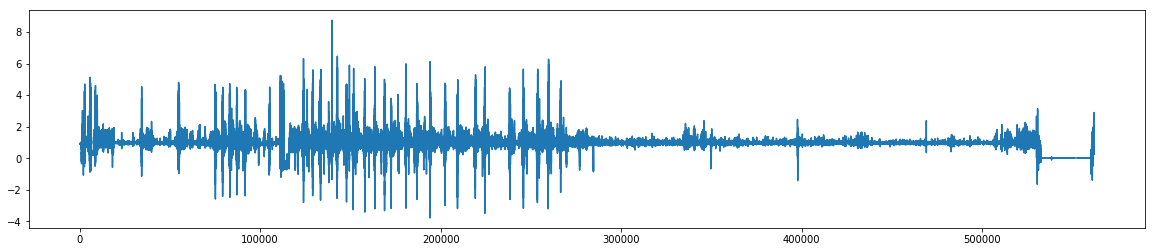

In [6]:
fig = plt.figure(figsize=[20,4])
plt.plot(arr[:,1])
plt.show()

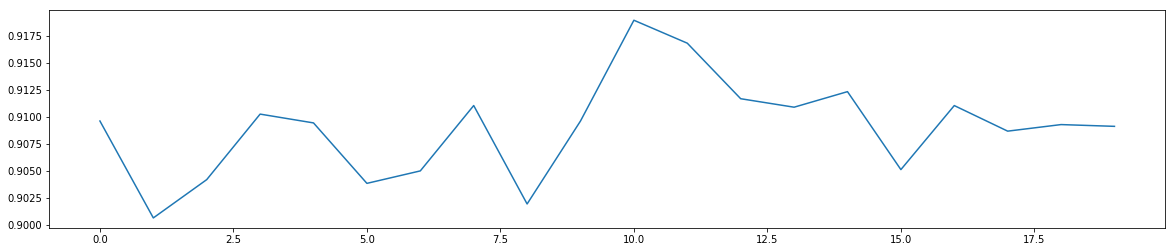

In [7]:
fig = plt.figure(figsize=[20,4])
plt.plot(arr[:,1][0:20])
plt.show()

/home/gayan/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/home/gayan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


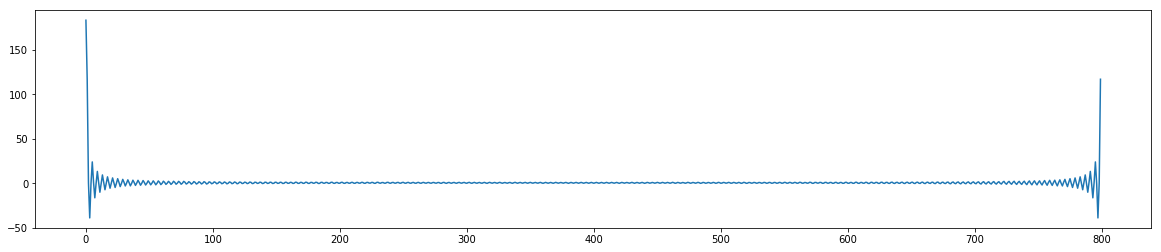

In [8]:
yf = scipy.fftpack.fft(arr[:,1][0:200],800)
fig = plt.figure(figsize=[20,4])
plt.plot(yf[0:])
plt.show()

In [103]:
# fft

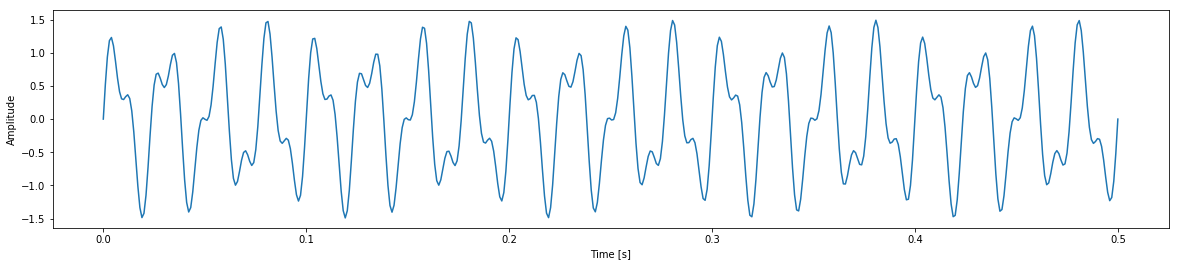

In [9]:
t = np.linspace(0, 0.5, 500)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)
plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

In [10]:
fft = np.fft.fft(s)


for i in range(4):
    print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))


Value at index 0:	(0.0003804834928392009-0.0605550317619008j) 
Value at index 499:	(0.00038048349284042216+0.0605550317619024j)
Value at index 1:	(0.001531771483137212-0.1218880852806952j) 
Value at index 498:	(0.0015317714831376839+0.12188808528069531j)
Value at index 2:	(0.003484103499379221-0.18481553960345798j) 
Value at index 497:	(0.0034841034993780273+0.18481553960345634j)
Value at index 3:	(0.006290406943658233-0.25023463917901845j) 
Value at index 496:	(0.006290406943658344+0.25023463917901834j)


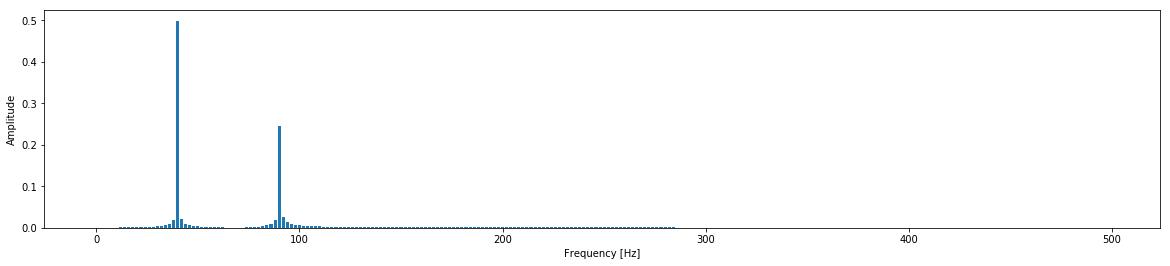

In [11]:
fft = np.fft.fft(s)
T = t[1] - t[0]  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.figure(figsize=[20,4])

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()

In [142]:
k=1;
for i in np.abs(fft[1:N//2]):
    print(k,i)
    k+=1

1 0.06055622708997926
2 0.12189770981142582
3 0.18484837747762822
4 0.2503136909251477
5 0.3193326675559437
6 0.3931458947551616
7 0.47328981707609685
8 0.5617338852814434
9 0.6610887736522228
10 0.7749360349378488
11 0.9083738869628093
12 1.0689678402328895
13 1.2685091372293629
14 1.5265175395192971
15 1.8779113790360102
16 2.3920653718936062
17 3.2294772804800873
18 4.865087912997508
19 9.5998716067324
20 249.35707318413378
21 10.366904966770957
22 5.027017029191594
23 3.274864731018353
24 2.3910208364861028
25 1.8489055375100367
26 1.4750694940789562
27 1.1954418665393416
28 0.9728307387112959
29 0.7862510414397865
30 0.6226724007199528
31 0.47323945043468935
32 0.3313248238553864
33 0.1913910430080072
34 0.04820151491468389
35 0.10387336643323655
36 0.2716564749758954
37 0.46432565392128866
38 0.6953968989518712
39 0.9865426711368603
40 1.3758187913891637
41 1.9378831462687045
42 2.843402774663264
43 4.588922018742866
44 9.491754382786594
45 122.64417537348984
46 12.89631820736735

In [184]:
def DFT(x):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param x: (array)
    """

    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

In [186]:
DFT(arr[:,1])

MemoryError: Unable to allocate 4.60 TiB for an array with shape (562198, 562198) and data type complex128